In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


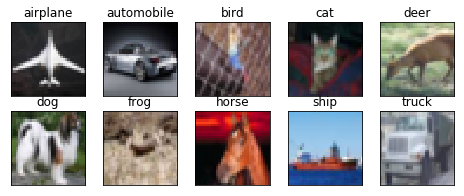

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
train_labels_integer = train_labels

test_labels_integer = test_labels

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels_integer[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import SeparableConv2D,GlobalAveragePooling2D,MaxPooling2D, Dropout, Conv2D, Input
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model



**Deptwise Separable**

In [0]:
from keras.layers import Concatenate
import tensorflow as tf

from keras.layers import SeparableConv2D,GlobalAveragePooling2D,MaxPooling2D, Dropout, Conv2D, Input, Lambda
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [0]:
def space_to_depth_keras(x):
  return tf.space_to_depth(x, block_size=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=3, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=3, activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 1), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(1, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(256, kernel_size=3, activation="relu", padding="same")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, None, None, 3 896         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 6 18496       conv2d_93[0][0]                  
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 1 24704       conv2d_94[0][0]                  
__________________________________________________________________________________________________
conv2d_96 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 60s 154ms/step - loss: 1.8865 - acc: 0.2877 - val_loss: 1.5853 - val_acc: 0.4077

Epoch 00001: val_acc improved from -inf to 0.40770, saving model to assignment_6b_eva.hdf5
Epoch 2/50
390/390 [==============================] - 55s 140ms/step - loss: 1.4349 - acc: 0.4746 - val_loss: 1.2493 - val_acc: 0.5473

Epoch 00002: val_acc improved from 0.40770 to 0.54730, saving model to assignment_6b_eva.hdf5
Epoch 3/50
390/390 [==============================] - 53s 137ms/step - loss: 1.1606 - acc: 0.5859 - val_loss: 1.0444 - val_acc: 0.6259

Epoch 00003: val_acc improved from 0.54730 to 0.62590, saving model to assignment_6b_eva.hdf5
Epoch 4/50
390/390 [==============================] - 54s 138ms/step - loss: 0.9811 - acc: 0.6536 - val_loss: 0.9921 - val_acc: 0.6474

Epoch 00004: val_acc improved from 0.62590 to 0.64740, saving model to assignment_6b_eva.hdf5
Epoch 5/50
390/390 [==============================] - 54s 137ms/step - loss: 0.8740

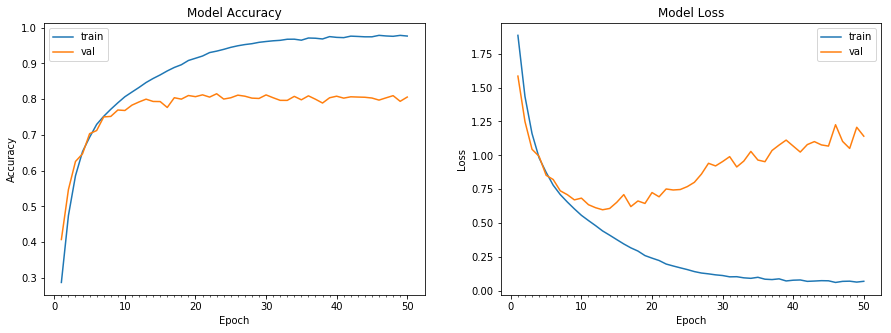

Accuracy on test data is: 81.51


In [0]:
# Define the model

def conv_block(x):
  
  x = Conv2D(64, kernel_size = 3,activation="relu" ,border_mode='same') (x)
  
  x = Conv2D(128, kernel_size = (3,1),  border_mode='same') (x)
  x = Conv2D(128, kernel_size = (1,3),  activation="relu", border_mode='same') (x)
  
  
  #Dropout(0.2)
  
  x = SeparableConv2D(256, kernel_size = 3, activation="relu", border_mode='same') (x)
  
  
  x = Dropout(0.4)(x)
  x = SeparableConv2D(512, kernel_size = 3,activation="relu", border_mode='same')(x)
  
  
  return x

def transition_block(x):
  

  x = Convolution2D(32, 1, 1, border_mode='same') (x)

  x = MaxPooling2D(pool_size=(2, 2))(x)
  
  return x

inputs = Input(shape=(None,None,3))
x = Convolution2D(32, kernel_size = 3,activation="relu" ,border_mode='same')(inputs) #1 


x = conv_block(x) #9

x = transition_block(x)#10

rf_12 = Conv2D(64, kernel_size = 3,activation="relu" ,border_mode='same') (x)#12


x = Conv2D(64, kernel_size = 3,activation="relu" ,border_mode='same') (x) #12

rf_14 = Conv2D(64, kernel_size = 3,activation="relu" ,border_mode='same') (x) #14

#rf_9 = Lambda(space_to_depth_keras)(rf_12)

x = Concatenate(name="merge_rf12_14")([rf_12, rf_14])

dilation_1 = Conv2D(64, kernel_size = 3,activation="relu" ,border_mode='same') (x)#16

dilation_2 = Conv2D(64, kernel_size = 3,activation="relu", dilation_rate=2,border_mode='same') (x)#20

x = Concatenate(name="merge_dilations")([dilation_1, dilation_2])

#model = transition_block(model)#27

#SeparableConv2D(64, kernel_size = 3,  border_mode='same')#35 
#Activation('relu')

x = Convolution2D(10, kernel_size = 3)(x) #37

x = GlobalAveragePooling2D()(x)

model_output = Activation('softmax') (x)

model = Model(inputs=inputs, outputs=model_output)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6b_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6b_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

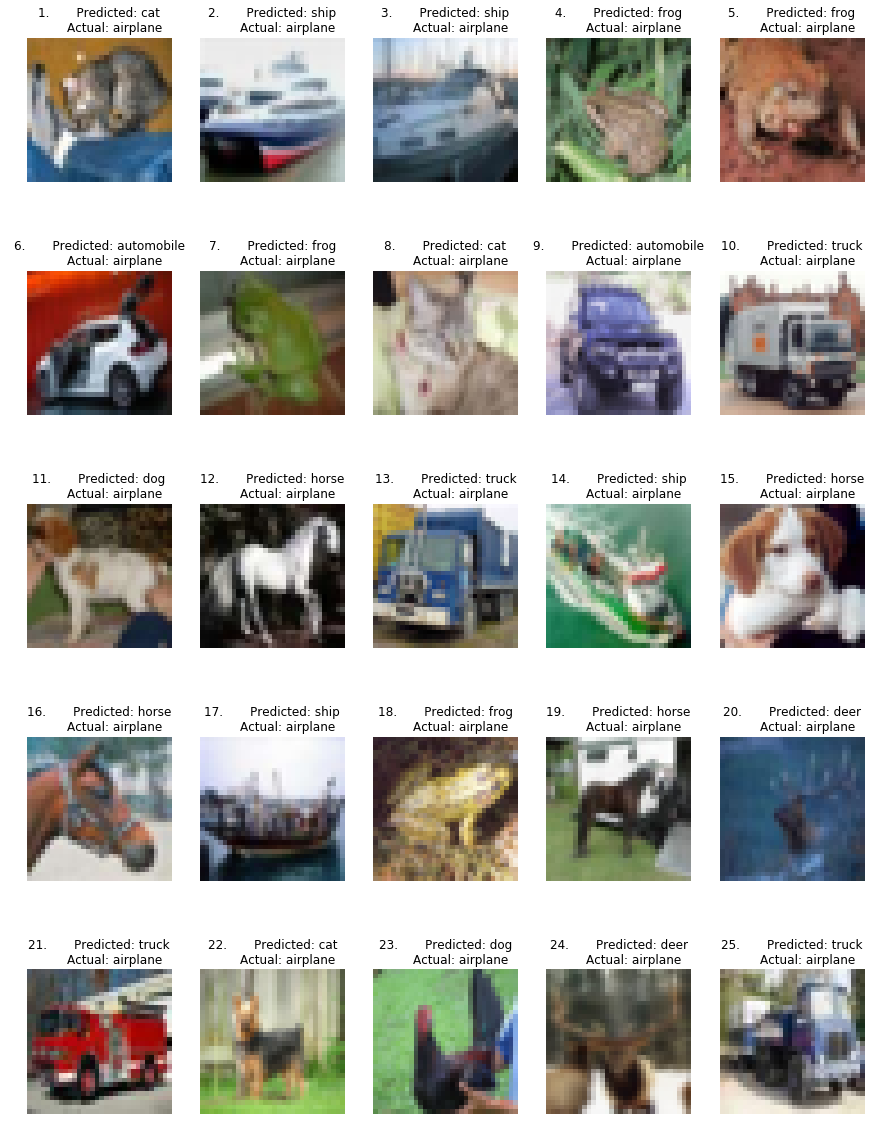

In [0]:
def get_wrongly_classified_indices(predictions, y_vals):
  
  """
  Takes predicted and actual values
  Returns a tuple of misclassified image indexes and their corresponding predicted and actual values
  
  NOTE: Make sure your predictions are in the same order of actuals, using shuffle=False while predicting would be important
  
  Params:
  predictions: probability values of predictions
  y_vals: actual values of data
  """
  
  predicted_y = np.argmax(predictions, axis=1)
  
  actual_y = np.argmax(y_vals, axis = 1)
  
  wrong_indices = np.nonzero(~(actual_y == predicted_y))
  
  return (wrong_indices[0], predicted_y[wrong_indices[0]], actual_y[wrong_indices[0]])
  
  
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,20))
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title],)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    #plt.tight_layout() # optional
    plt.subplots_adjust(hspace = 0.5)
    plt.show()
    
predictions = model.predict(test_features)
    
misclassified_image_idx = get_wrongly_classified_indices(predictions, test_labels_integer)

misclassified_image_idx

number_of_im = len(misclassified_image_idx[0])

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

if (number_of_im) > 25:
  number_of_im = 25

figures = {}

for i in range(number_of_im):
  
  title = str(i+1)+'.\tPredicted: '.expandtabs()+class_names[misclassified_image_idx[1][i]] + '\n\tActual: '.expandtabs() + class_names[misclassified_image_idx[2][i]]
  
  img_idx = misclassified_image_idx[0][i]
  
  image = test_features[img_idx].reshape(32,32,3)
  
  figures[title] = image
  

plot_figures(figures, 5, 5)

# Need feedback as to what could possible be the reason for below network to fail?

In [58]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.2))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model = transition_block(model)#27

model.add(Convolution2D(64, 3, 3,  border_mode='same'))#35 
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3,  border_mode='same'))#37
model.add(Activation('relu'))

model.add(Convolution2D(256, 3, 3,  border_mode='same'))#39
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, 3, border_mode='same')) #41

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_204 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_205 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_206 (Activation)  (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 32, 32, 128)       0         
__________

KeyboardInterrupt: ignored

# As you can see, accuracy never goes above 10%. But if i just remove the last 2-3 layers (the ones just befor 10* 3* 3 one) i get decent accuracy and if trained enough will go upto 80%+.

So question is why adding more layers is making the network go dead?

I understand if the accuracy when down that's because network is unable to even produce an identity function at the least, but why no learning at all?

Below i have removed those 2 layers and retrained, you can see the accuracy shooting up

In [57]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.2))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model = transition_block(model)#27

model.add(Convolution2D(64, 3, 3,  border_mode='same'))#35 
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, 3, border_mode='same')) #37

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_193 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_194 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_195 (Activation)  (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 32, 32, 128)       0         
__________

KeyboardInterrupt: ignored